In [10]:
import numpy as np
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Dataset Digits

In [2]:
#Load 
digits = load_digits()
X, y = digits.data, digits.target

#Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Formato/Visualização dos dados

In [3]:
#Formato dos dados
print("Formato de x:", X.shape)
print("Formato de y:", y.shape)
print("Número de classes:", len(np.unique(y)))

print("Formato de X_train:", X_train.shape)
print("Formato de X_test:", X_test.shape)


Formato de x: (1797, 64)
Formato de y: (1797,)
Número de classes: 10
Formato de X_train: (1437, 64)
Formato de X_test: (360, 64)


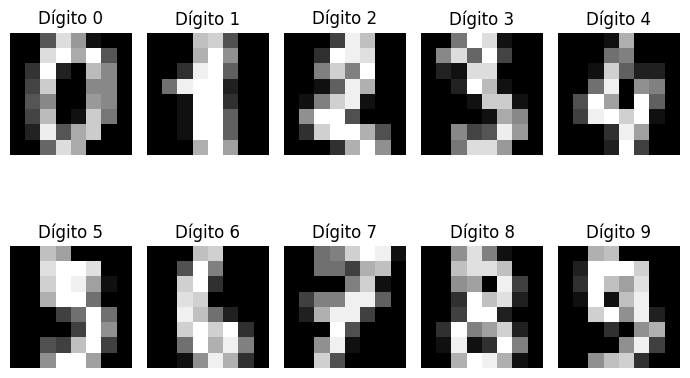

In [4]:
#Visualização dos dados
fig, axes = plt.subplots(2, 5, figsize=(7, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Dígito {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

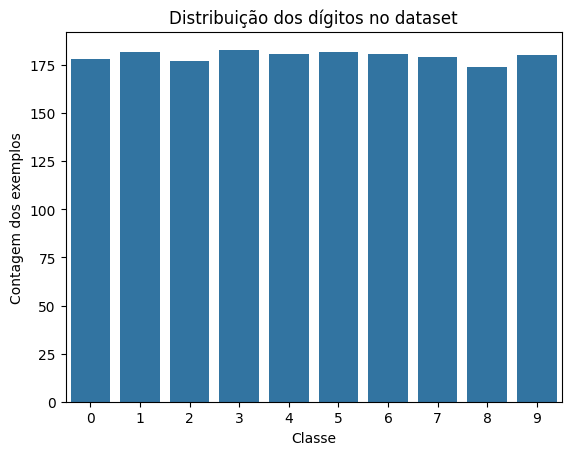

In [5]:
df = pd.DataFrame({'Label': digits.target})
sns.countplot(x='Label',  data=df)
plt.title("Distribuição dos dígitos no dataset")
plt.xlabel('Classe')
plt.ylabel('Contagem dos exemplos')
plt.show()

In [7]:
pca2 = PCA(n_components=2)
X2_train = pca2.fit_transform(X_train)
X2_test  = pca2.transform(X_test) 

print("Formato de X2_train:", X2_train.shape)
print("Formato de X2_test:", X2_test.shape)

Formato de X2_train: (1437, 2)
Formato de X2_test: (360, 2)


# Uso do método dual na versão OvO

Caso com PCA para sermos capazes de visualizar graficamente a divisão das classes

Accuracy: 0.48


c:\Users\conta\Desktop\Stuff\Universidade\OML\Projeto-OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


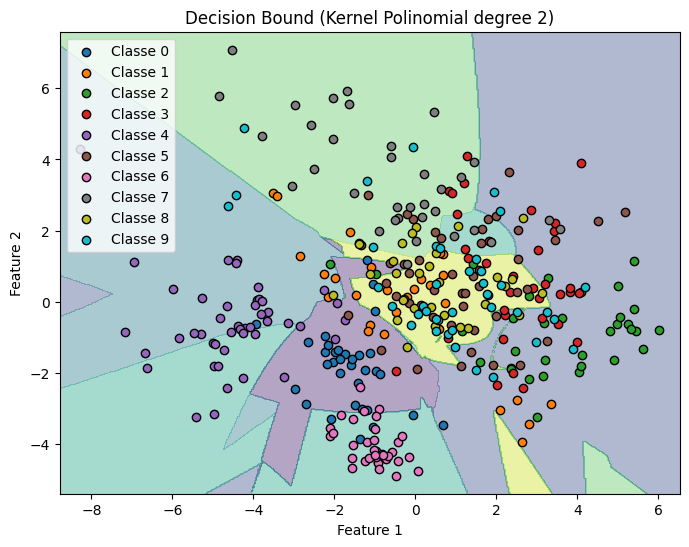

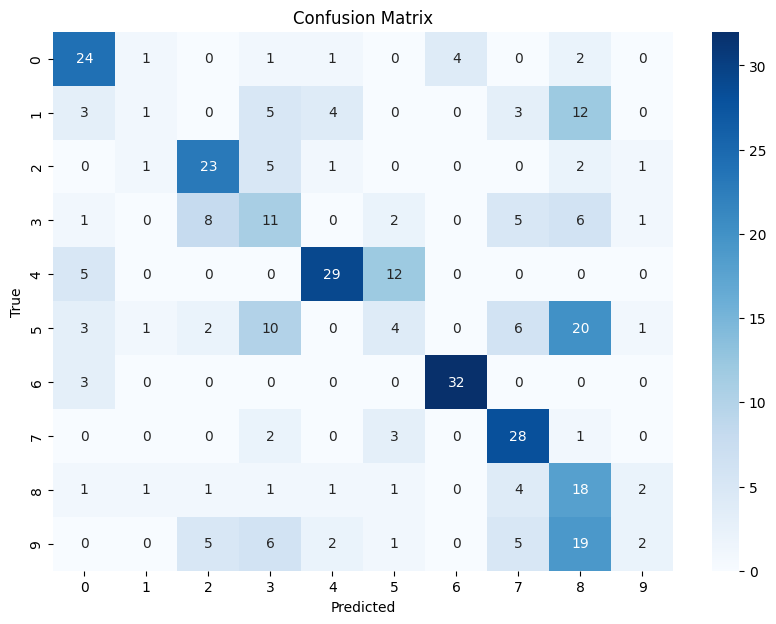

In [ ]:
# Create an instance of the CLog_OVO classifier
clf = CLog_OVO(n_iter=5000, batch_size=1, kernel=2, step=0.001, mode='dual', iterative=True)
    
# Fit the model on the training data
clf.fit(X2_train, y_train)
    
# Make predictions on the test data
y_pred = clf.predict(X2_test)
#pribt probs
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
    
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
plot_decision_boundary(clf, X2_test, y_test,500)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Tal como podemos ver na matriz de confusão, o modelo foi capaz de prever bem a maior parte das classes, contudo teve muita dificuldade em tratar as classes 1, 5 e 9. Além disso, é de notar que todas estas 3 classes foram muito confundidas com a classe 8 em específico, já que o 3 e 9 podem ser parecidos com um 8 quando mal desesenhados. No caso do 1, é normal ocorrer alguns erros, principalmente nas imagens cujos dígitos encontram-se mal desenhados, por exemplo existe um 1 que apenas parece um retângulo. Por fim, é importante referir o facto de que estes resultados nunca alcançarão valores "bons" visto que a dimensionalidade do modelo foi reduzida de forma a ser possível a visualização dos dados, sendo este exemplo meramente ilustrativo.

Caso de teste com o dataset original

Training binary classifiers:   0%|          | 0/45 [00:00<?, ?it/s]c:\Users\conta\Desktop\Stuff\Universidade\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
Training binary classifiers: 100%|██████████| 45/45 [10:10<00:00, 13.56s/it, Par=8 vs 9]


Accuracy: 0.92


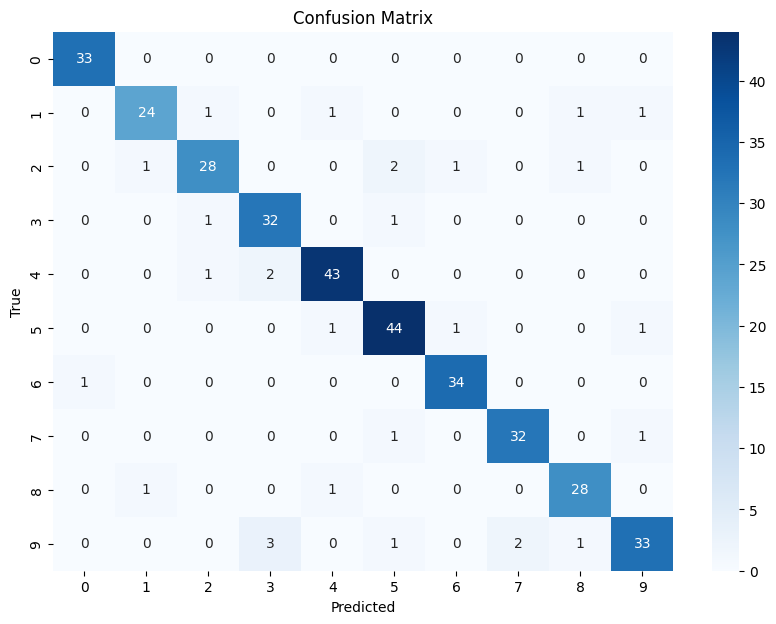

In [14]:
# Create an instance of the CLog_OVO classifier
clf = CLog_OVO(n_iter=5000, batch_size=1, kernel=2, step=0.001, mode='dual', iterative=True)
    
# Fit the model on the training data
clf.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = clf.predict(X_test)
#pribt probs
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
    
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Resultados com uma melhoria considerável aos anteriores visto que foi utilizado os dados originais ao invés de dados com dimensionalidade resuzida (PCA). Como é de esperar ainda existem algumas confusões e até como vemos nos emxemplos indicados em baixo, de facto existem imagens que parecem mais do que um número ou até um dígito diferente do que realemnte são. 

# Mais algumas informações sobre os resultados

In [15]:
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in clf.classes_]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.92      0.86      0.89        28
           2       0.90      0.85      0.88        33
           3       0.86      0.94      0.90        34
           4       0.93      0.93      0.93        46
           5       0.90      0.94      0.92        47
           6       0.94      0.97      0.96        35
           7       0.94      0.94      0.94        34
           8       0.90      0.93      0.92        30
           9       0.92      0.82      0.87        40

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



In [16]:

class_accuracies = []
for cls in clf.classes_:
    idx = (y_test == cls)
    acc = (y_pred[idx] == y_test[idx]).mean()
    class_accuracies.append((cls, acc))

for cls, acc in class_accuracies:
    print(f"Accuracy para a classe {cls}: {acc:.2f}")

Accuracy para a classe 0: 1.00
Accuracy para a classe 1: 0.86
Accuracy para a classe 2: 0.85
Accuracy para a classe 3: 0.94
Accuracy para a classe 4: 0.93
Accuracy para a classe 5: 0.94
Accuracy para a classe 6: 0.97
Accuracy para a classe 7: 0.94
Accuracy para a classe 8: 0.93
Accuracy para a classe 9: 0.82


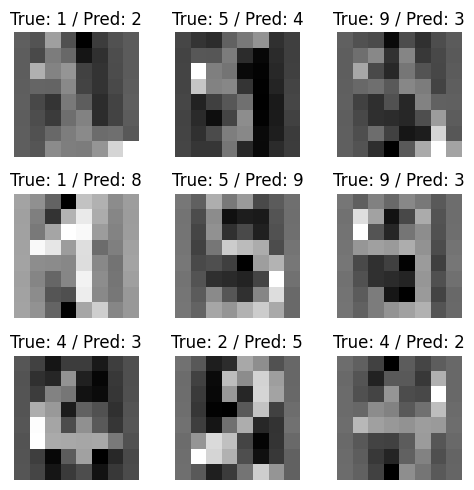

In [17]:
errors = np.where(y_pred != y_test)[0]
plt.figure(figsize=(5, 5))
for i, idx in enumerate(errors[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')  
    plt.title(f"True: {y_test[idx]} / Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()